In [1]:
# Here are some libraries you may need to use
%matplotlib inline
import numpy as np
import sympy as sym

import matplotlib.pyplot as plt
sym.init_printing(use_unicode=True)

----
# Question 4 - (25 points) Data Science - Principal Component Analysis



Principla component analysis (PCA) is a powerful tool used to analyze data sets and visulization. 


Suppose there are $m$ individuals. 
We measure the same $n$ variables for each individual. 
We can put the measurement into a $m\times n$ matrix. 
Then PCA will create a low-dimensional representation of the high dimensional ($n$-dimensional) data. 


For the purpose of visualization in the exam, we are given a $100\times 2$ matrix, that is we have $100$ individuals and each individual has two variables. 
We can plot these 100 points in the figure. 
In this example, we have 100 points in two dimensional, and we will find a one dimensional representation for the points. 
That is, we will find a line in the 2D space such that the data points are very close to the line.


In [2]:
np.random.seed(123)
m = 100;
x = 5*np.random.rand(m)
y = 2*x + 1 + 0.2*np.random.randn(m)

x = x.reshape(m, 1)
y = y.reshape(m, 1)

X = np.hstack([x, y])

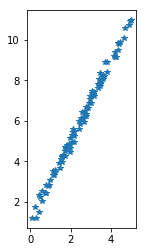

In [3]:
plt.plot(X[:,0], X[:,1], '*')
plt.axis('scaled');

plt.show()

From the plot, we see that all the points are along one line $y=2x+1$ in the $xy$-plane. 
Because this is in 2D, and we can see it. 
In real application, the dimension is very high, and we can not visualize it. 
The purpose of PCA for this given data set is to find the line in the $xy$-plane and project all data points onto this line. 
Next, we will do the following steps to find the line.

&#9989; <font color=red>**Question a:**</font> Find the center point $X_c$ of all the data points, and show it in the plot. 
The variable values for the center point is the average of the variable over all data points. 

In [4]:
# Finish the following code to find the center point X_c 7
X_c = 


plt.plot(X[:,0], X[:,1], '*')
plt.plot(X_c[0,0],X_c[0,1],'ro')
plt.axis('scaled');
plt.show()

SyntaxError: invalid syntax (<ipython-input-4-54b697be0a3e>, line 2)

[[2.5071444  6.02129675]]


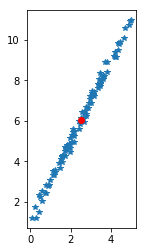

In [9]:
###ANSWER###
X=np.matrix(X)
X_c = np.sum(X, axis=0)
X_c = X_c/X.shape[0]
print(X_c)
plt.plot(X[:,0], X[:,1], '*')
plt.plot(X_c[0,0],X_c[0,1],'ro')
plt.axis('scaled');
plt.show()

###ANSWER###

Then we plot $(X-X_c)$ in the $xy$-plane. 
It moves all the data points such that the center point becomes the original $(0,0)$. 
This is the same as applying a transpose matrix. 
The step is a very important step in many method in data science.

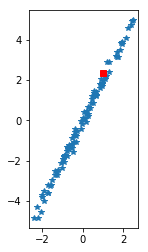

In [12]:
X_1 = X - X_c
plt.plot(X_1[:,0], X_1[:,1], '*')
plt.plot(X_1[0,0], X_1[0,1], 'rs')
plt.axis('scaled');
plt.show()

&#9989; <font color=red>**Question b:**</font> Find the variance of the data points. The variance is calculated by 
$\sum\limits_i (x_1^i-x_1^c)^2+(x_2^i-x_2^c)^2$, where $x^c=(x_1^c,x_2^c)$ is the center point, and $(x_1^i,x_2^i)$ is the $i$-th data point.  


Matrix operations can simplify your answer. 
You are encouraged to use matrix operations here, but you can use any method. 

In [13]:
# Put your answer here 

In [14]:
###ANSWER###
X_c = np.sum(X, axis=0)
X_c = X_c/X.shape[0]
X_1 = X - X_c
XtX = X_1.transpose()*X_1
print(XtX.trace())
###ANSWER###

[[750.01337218]]


&#9989; <font color=red>**Question c:**</font>  This is an important step for PCA. 
It requires eigen decomposition, which will be covered after this midterm. 
Therefore, in this exam, we assume that we solved this step. 
When we look at the point in Question a, the slop of the line is not $0$. 
In this Question, we need to rotation it such that the slop is close to $0$ (Keep in mind, we want to find a line). 

Look at the figure and approximate the angle that you will need to rotate. 
After the rotation, you may notice that the $y$ values are very small, and the points are very close to the $x$-axis.

In [ ]:
# Finish the following code for the rotation. We put the first point in the plot so you can adjust your angle 

theta = 
J1 =    # J1 is the rotation matrix 
X_2 = X_1*


plt.plot(X_2[:,0], X_2[:,1], '*')
plt.plot(X_2[0,0], X_2[0,1], 'rs')
plt.axis('scaled');
plt.show()

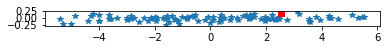

In [15]:
###ANSWER###  
theta = 1.1
J1 = np.matrix([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
X_2 = X_1*J1
plt.plot(X_2[:,0], X_2[:,1], '*')
plt.plot(X_2[0,0], X_2[0,1], 'rs')

plt.axis('scaled');
plt.show()
###ANSWER###

&#9989; <font color=red>**Question d:**</font> Since we need to reduce the dimension from $2$ to $1$, we can remove the $y$ values because they are very small. 
So we keep the $x$ values for all data points, and transform them back to the original plot. 
That is, we first rotate all the data points back to have a slop and move the center point to be $X_c$.

In [ ]:
# Finish the following code to transform it back. You should see the new data points are close the orignal points.  
X_2[:,1] = 0
J2 = np.linalg.inv(J1) 
X_3 = X_2*



plt.plot(X_3[:,0], X_3[:,1], 'r*')
plt.plot(X_3[0,0], X_3[0,1], 'bs')
plt.plot(X[:,0], X[:,1], 'b*')
plt.axis('scaled');
plt.show()

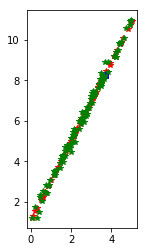

In [18]:
###ANSWER###
X_2[:,1] = 0
X_3 = X_2*np.linalg.inv(J1)+ X_c;
plt.plot(X_3[:,0], X_3[:,1], 'r*')
plt.plot(X_3[0,0], X_3[0,1], 'bs')
plt.plot(X[:,0], X[:,1], 'g*')
plt.axis('scaled');
plt.show()
###ANSWER###

&#9989; <font color=red>**Question e:**</font>   Measure the variance for the new data points. Find the variance of the new data points in the same way as the original data points. Compare the new variance with the previous one. 

In [23]:
# Put your answer here.   
X_3c = np.sum(X_3, axis=0)
X_3c = X_3c/X_3.shape[0]
X_4 = X_3 - X_3c
XtX = X_4.transpose()*X_4
print(XtX.trace())

[[749.20707191]]


&#9989; <font color=red>**Question f (bonus):**</font>   Change the angle *theta* in the previous code and compute the variance again. Did you get a larger variance or a smaller variance? Try to explain the reason why.  

----
# Question 2 - (25 points) Singular Value Decomposition -- Image Denoising

In this question, we will use SVD to remove the noise in an image by approximating the image with a low-rank matrix.

First, let's construct a grayscale image. 
A grayscale image can be represented by a matrix, whose elements are values between $0$ (black) and $1$ (white). 
Run the following code to see a grayscale image of $21\times 26$.

In [24]:
I0 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

I0 = np.concatenate((I0, I0, I0), axis=0)
I  = np.concatenate((I0, I0), axis=1)

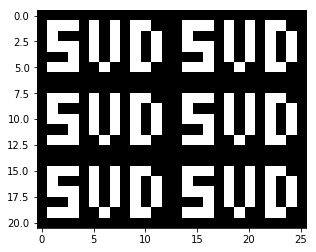

In [25]:
plt.imshow(I, interpolation='nearest', cmap='gray')
plt.show()

&#9989; <font color=red>**Question a:**</font> Find the rank of this matrix $I$ (the grayscale image).

In [26]:
#####Start your code here ##### 6

#####End of your code here#####

In [27]:
##ANSWER##
#####Start your code here #####
np.linalg.matrix_rank(I)
#####End of your code here#####
##ANSWER##

5

&#9989; <font color=red>**Question b:**</font> Find an approximation of the image with only the first 3 singular values.

In [28]:
#####Start your code here ##### 6


I3 = 

plt.imshow(I3, interpolation='nearest', cmap='gray')
plt.show()
#####End of your code here#####

SyntaxError: invalid syntax (<ipython-input-28-b3d862c1b03d>, line 4)

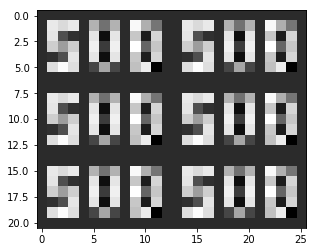

In [29]:
##ANSWER## 
#####Start your code here #####
u, s, vt = np.linalg.svd(I)
keep = 3
I3 = np.matrix(u[:,:keep])*np.matrix(np.diag(s[:keep]))*np.matrix(vt[:keep,:])

plt.imshow(I3, interpolation='nearest', cmap='gray')
plt.show()
#####End of your code here#####
##ANSWER##

Since this grayscale image can be represented as a low-rank matrix. We can use the singular value decomposition to remove random noise that corrupts the image. 

The following code adds Gaussian noise onto the image. It is not easy to read all the characters in this noisy image.

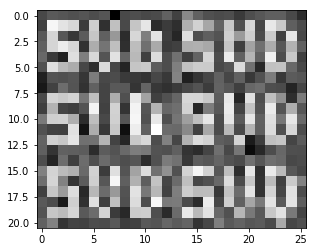

In [30]:
In = I + 0.2* np.random.randn(I.shape[0],I.shape[1])
plt.imshow(In, interpolation='nearest', cmap='gray')
plt.show()

&#9989; <font color=red>**Question c:**</font> Plot the singular values of this noisy image.

In [31]:
#####Start your code here ##### 6


#####End of your code here#####

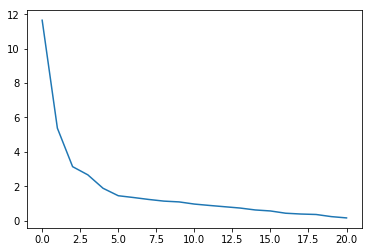

In [32]:
##ANSWER##
#####Start your code here #####
u, s, vt = np.linalg.svd(In)

plt.plot(s)
#####End of your code here#####
##ANSWER##

We think the main signal is contained in large singular values and the noise is in small singular values. So we would like to keep only the largest singular values. 
From the previous tasks, we know that we can approximate the original image with only 5 singular values. 
Let's keep the first 5 singular values, and see the results.

&#9989; <font color=red>**Question d:**</font> Find an approximation of the noisy image with only the first 5 singular values. You should be able to read all the characters clearly now.

In [33]:
#####Start your code here ##### 7


#####End of your code here#####

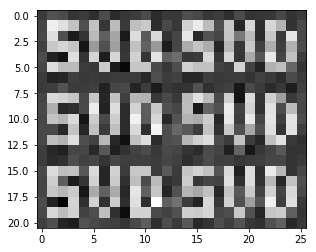

In [34]:
##ANSWER##
#####Start your code here #####
u, s, vt = np.linalg.svd(In)
keep = 5
I5 = np.matrix(u[:,0:keep])*np.matrix(np.diag(s[0:keep]))*np.matrix(vt[0:keep,:])

plt.imshow(I5, interpolation='nearest', cmap='gray')
plt.show()
#####End of your code here#####
##ANSWER##

----
# Question 4 - (25 points) Cryptography 
<img src="https://3b6xlt3iddqmuq5vy2w0s5d3-wpengine.netdna-ssl.com/state-of-security/wp-content/uploads/sites/3/shutterstock_509910508-800x450.jpg" width=50%>

In this problem we are going to write some code to encrypt and decrypt message using linear algebra and inverse functions. We will represent the message as a matrix $m$ and the encrypted (secret) message as $s$.    We will also define an encryption matrix $A$ and a decryption matrix $B$ such that:

$$s=Am$$

$$m=Bs$$

**Step 1 (letters to numbers):** The first step is to convert our message string into a list of numbers and be able to take a list of numbers and convert it back into a string. For example;  A=0, B=1, C=2, etc. The following functions use an existing letter to number encoding called ASCII so it includes uppercase letters, lowercase letters, numbers and many symbols.

In [36]:
# Here are some libraries you may need to use
%matplotlib inline
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
sym.init_printing(use_unicode=True)

In [37]:
def str2numlist(s):
    """Convert a string to a list of numbers"""
    n = [ord(c)-ord('A') for c in s]
    return n

def numlist2str(n):
    """Convert list of numbers to a string"""
    s = [chr(c+ord('A')) for c in n]
    s = ''.join(s)
    return s

The following code demonstrates how these functions are used:

In [38]:
message='abcdeABCDE'
num_message = str2numlist(message)
print(num_message)

[32, 33, 34, 35, 36, 0, 1, 2, 3, 4]


In [39]:
message = numlist2str(num_message)
print(message)

abcdeABCDE


**Step 2 (message as a matrix):** Now we need our number list to be in a matrix format.  The size of our message matrix depends on the size of our square encryption matrix $A$.   For this problem lets assume $A$ is a $4x4$ square matrix. This means that our message matrix should be $4 x l$, where length $l$ changes in size depending on the size of the message.

The following functions use the ```str2numlist``` and ```numlist2str``` functions from above to convert our message strings into a message matrix $m$ and our message matrix $m$ back to a string. 

In [40]:
def message2mat(message, spacing=4):
    """Add extra spaces to message and turn into numpy matrix of size 4x(N%4)"""

    message_len = len(message)
    extra_spaces = spacing - message_len % spacing
    message = message.ljust(len(message) + extra_spaces)
    num_message = str2numlist(message)
    message_mat=np.matrix(np.reshape(num_message, (spacing,-1)))
    return message_mat

def mat2message(message_mat):
    try:
        """Unroll a numpy matrix into a list of numbers"""
        # found this here https://stackoverflow.com/questions/5183533/how-to-make-list-from-numpy-matrix-in-python
        num_message = np.round(np.array(message_mat).reshape(-1,)).astype(int).tolist()
        message = numlist2str(num_message)
        message = message.strip()
    except:
        raise Exception('Invalid Message Matrix!!!!')
        
    return message

The following code demonstrates how these functions are used:

In [41]:
m = message2mat(message)
m

matrix([[ 32,  33,  34],
        [ 35,  36,   0],
        [  1,   2,   3],
        [  4, -33, -33]])

In [42]:
message = mat2message(m)
message

'abcdeABCDE'

**Step 3 (encrypt message):** Now that we have a message as a matrix we can multiply that matrix by our encryption matrix $A$ which is defined as follows:

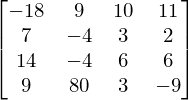

In [48]:
A = np.matrix([[ -18, 9, 10, 11], [ 7, -4, 3, 2], [14, -4, 6, 6], [9, 80, 3, -9]])
sym.Matrix(A)

<font color=red>**Question 4.a:**</font> Apply $A$ to the message matrix $m$ and store the results in a new matrix $s$. 

In [51]:
#put your code here
s=A*m
s

matrix([[-207, -613, -945],
        [  95,   27,  181],
        [ 338,  132,  296],
        [3055, 3480,  612]])

**Step 4 (Decrypt the message):** In order to decrypt your message your friends will already need the decryption matrix $B$.

<font color=red>**Question 4.b:**</font> Generate the decryption matrix $B$

In [46]:
#Put your code here
B=A.I # the inverse of A if it exists
B

matrix([[-2.40435506e-02, -6.12430062e-02,  6.91441101e-02,
          3.09995463e-03],
        [ 4.53651898e-04, -1.12052019e-01,  5.05821866e-02,
          9.37547255e-03],
        [ 5.73113564e-02,  8.44094964e-01, -3.59783759e-01,
          1.77680327e-02],
        [-9.07303796e-04, -7.75895962e-01,  3.98835627e-01,
         -1.87509451e-02]])

<font color=red>**Question 4.c:**</font> Now apply the Decryption matrix $B$ to our encrypted message $s$ and pass the resulting matrix into ```mat2message``` to see the original message

In [13]:
#Put your code here
mat2message(B*s)

'abcdeABCDE'

<font color=red>**Question 4.d:**</font> The following message was encrypted using matrix $A$ from above. What is the message?

In [53]:
secret_message = [[ 1055,  -121,  -401,  -680,   331,  1375, -1348,   -35,  -278, 1222,  -868, -1048,   262,  1252,  -479,  -154,  -186,  -369, -1070],
                  [ 239, 619,   306,   232,   441,   -69,   554,   603,   627, -1,   382,   429,   565,   129,   269,    84,   193,   187, 501],
                  [ 720,  1182,   554,   576,  1044,   -52,   910,  1228,  1254, 16,   614,   800,  1266,   216,   630,   288,   508,   452, 804],
                  [ 2974, -2493,   901,   978,  1542,  -184, -1743,  -910,  -965, -1544,  -945, -2658,   763, -3204,  3999,  4364,  4588,  3654, -1818]]

In [54]:
#Put your code here.
mat2message(B*secret_message)

'Thank you for taking CMSE 314, I hope you learned something and had fun!!'

<font color=red>**Question 4.e:**</font> Compose your own secret message (minimum 10 characters long) to the instructor using the above encoding matrix $A$.  Make sure you print your original message string, the original message matrix, and the secret message matrix.  Include code to check and verify that the message can be decoded using the $B$ matrix. 

In [57]:
# Put your answer to the above question here, example:
message = 'Linear algebra is the branch of mathematics concerning linear equations and their representations through matrices and vector spaces.'
m = message2mat(message)
s = A*m
mat2message(B*s)

'Linear algebra is the branch of mathematics concerning linear equations and their representations through matrices and vector spaces.'